In [6]:
# ============================================
#        Import Libraries & Load Data
# ============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load dataset
titanic = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/titanic_train.csv')
print("✓ Dataset loaded successfully!")
print(f"Shape: {titanic.shape}")


✓ Dataset loaded successfully!
Shape: (891, 12)


In [7]:
# ============================================
#             Dataset Overview
# ============================================
print("=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)

# First rows
print("\n📊 First 5 Rows:")
print(titanic.head())

# Info
print("\n📋 Dataset Info:")
print(titanic.info())

# Statistics
print("\n📈 Descriptive Statistics:")
print(titanic.describe())

# Basic counts
print(f"\n✓ Total Rows: {titanic.shape}")
print(f"✓ Total Columns: {titanic.shape}")
print(f"✓ Duplicates: {titanic.duplicated().sum()}")


DATASET OVERVIEW

📊 First 5 Rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            3


MISSING VALUES ANALYSIS

📌 Missing Values:
            Column  Missing_Count  Percentage
Age            Age            177   19.865320
Cabin        Cabin            687   77.104377
Embarked  Embarked              2    0.224467


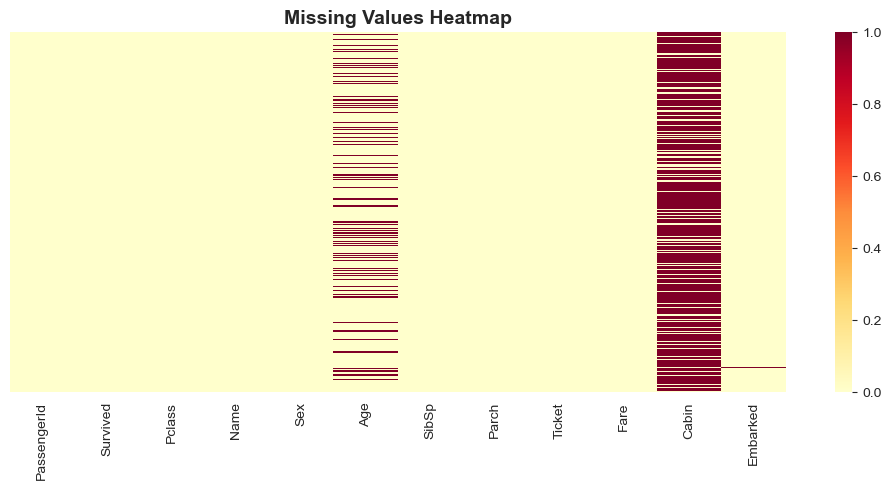

In [8]:
# ============================================
#            Check Missing Values
# ============================================
print("\n" + "=" * 60)
print("MISSING VALUES ANALYSIS")
print("=" * 60)

# Calculate missing values
missing_values = titanic.isnull().sum()
missing_percent = (missing_values / len(titanic)) * 100

missing_df = pd.DataFrame({
    'Column': titanic.columns,
    'Missing_Count': missing_values,
    'Percentage': missing_percent
})

print("\n📌 Missing Values:")
print(missing_df[missing_df['Missing_Count'] > 0])

# Visualize missing values
plt.figure(figsize=(10, 5))
sns.heatmap(titanic.isnull(), cbar=True, cmap='YlOrRd', yticklabels=False)
plt.title('Missing Values Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('01_missing_values.png', dpi=300, bbox_inches='tight')
plt.show()


In [9]:
# ============================================
#            Handle Missing Values
# ============================================
print("\n" + "=" * 60)
print("HANDLING MISSING VALUES")
print("=" * 60)

# Age: Fill with median
age_median = titanic['Age'].median()
titanic['Age'].fillna(age_median, inplace=True)
print(f"✓ Age: Filled {titanic['Age'].isnull().sum()} missing values with median ({age_median})")

# Embarked: Fill with mode
embarked_mode = titanic['Embarked'].mode()
titanic['Embarked'].fillna(embarked_mode, inplace=True)
print(f"✓ Embarked: Filled {titanic['Embarked'].isnull().sum()} missing values with mode ({embarked_mode})")

# Cabin: Drop (too many missing)
titanic.drop('Cabin', axis=1, inplace=True)
print("✓ Cabin: Dropped (687 missing values)")

# Verify
print(f"\n✓ Final Missing Values: {titanic.isnull().sum().sum()}")
print("✓ Data cleaning complete!")



HANDLING MISSING VALUES
✓ Age: Filled 0 missing values with median (28.0)
✓ Embarked: Filled 2 missing values with mode (0    S
Name: Embarked, dtype: object)
✓ Cabin: Dropped (687 missing values)

✓ Final Missing Values: 2
✓ Data cleaning complete!
